# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, statsmodels, and arch for data manipulation, plotting, and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import yfinance as yf
from datetime import datetime

# Load and Prepare EUR/INR Data
Load EUR/INR exchange rate data from Yahoo Finance, handle missing values, and compute daily percentage returns.

In [2]:
# Fetch EUR/INR data
ticker = yf.Ticker("EURINR=X")
df = ticker.history(period="2y")
df = df[["Close"]].rename(columns={"Close": "Rate"})
df = df[df["Rate"] > 0]

# Compute returns
df['Returns'] = df['Rate'].pct_change() * 100
df = df.dropna()

print(f"Data shape: {df.shape}")
print(df.head())

Data shape: (520, 2)
                                Rate   Returns
Date                                          
2023-12-20 00:00:00+00:00  91.149002  0.523853
2023-12-21 00:00:00+00:00  90.959000 -0.208453
2023-12-22 00:00:00+00:00  91.317001  0.393586
2023-12-25 00:00:00+00:00  90.670197 -0.708307
2023-12-26 00:00:00+00:00  90.670197  0.000000


# Figure 1: Raw EUR/INR Exchange Rate Time Series
Create a line plot of daily EUR/INR levels with date on the x-axis and rate on the y-axis using matplotlib.

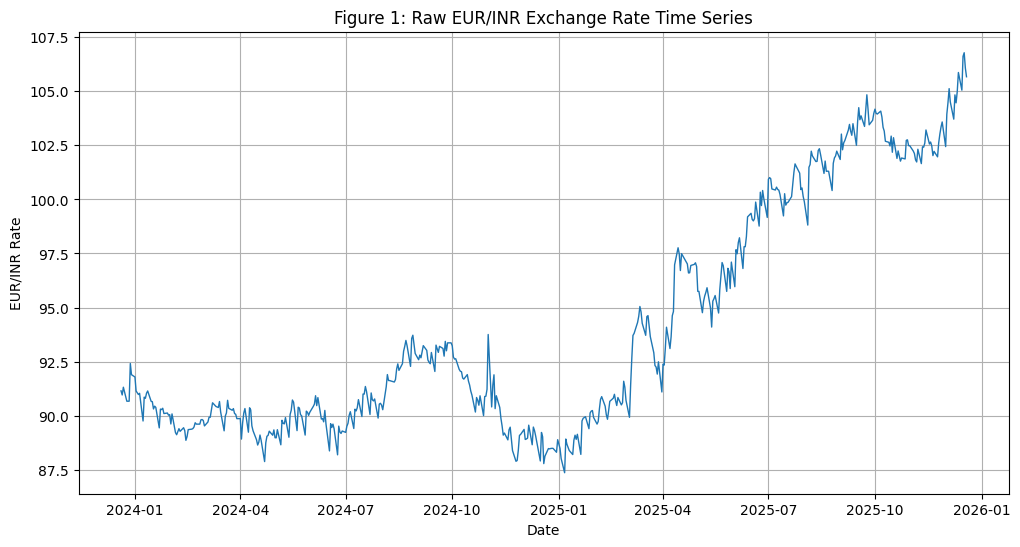

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rate'], linewidth=1)
plt.title('Figure 1: Raw EUR/INR Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('EUR/INR Rate')
plt.grid(True)
plt.show()

# Table 1: OLS Regression Output
Perform OLS regression on the time series data and display a table with coefficient, standard error, t-statistic, p-value, and R² using statsmodels.

In [3]:
# OLS Regression
y = df['Rate'].values
X = np.arange(len(y)).reshape(-1, 1)
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_const).fit()

# Create table
table_data = {
    'Coefficient (Time)': [ols_model.params[1]],
    'Standard Error': [ols_model.bse[1]],
    't-statistic': [ols_model.tvalues[1]],
    'p-value': [ols_model.pvalues[1]],
    'R²': [ols_model.rsquared]
}

table_df = pd.DataFrame(table_data)
print("Table 1: OLS Regression Output")
print(table_df.to_string(index=False))

Table 1: OLS Regression Output
 Coefficient (Time)  Standard Error  t-statistic       p-value       R²
           0.029947        0.000831    36.047933 2.676070e-143 0.714986


In [7]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1299.
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          2.68e-143
Time:                        12:26:06   Log-Likelihood:                -1280.3
No. Observations:                 520   AIC:                             2565.
Df Residuals:                     518   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3366      0.249    346.664      0.000      85.847      86.826
x1             0.0299      0.001     36.048      0.000       0.028       0.032
==============================================================================
Omnibus:                       34.742   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.443
Skew:                          -0.611   Prob(JB):                     1.22e-08
Kurtosis:                       2.564   Cond. No.                         599.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Table 2: ARIMA Model Specification
Fit an ARIMA model to the data and display a table with selected (p, d, q), AIC/BIC, and log-likelihood using statsmodels.

In [4]:
# ARIMA Model
order = (5, 1, 0)
arima_model = ARIMA(df['Rate'], order=order)
arima_fitted = arima_model.fit()

# Table
arima_table = {
    'Selected (p, d, q)': [str(order)],
    'AIC': [arima_fitted.aic],
    'BIC': [arima_fitted.bic],
    'Log-likelihood': [arima_fitted.llf]
}

arima_df = pd.DataFrame(arima_table)
print("Table 2: ARIMA Model Specification")
print(arima_df.to_string(index=False))

c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Table 2: ARIMA Model Specification
Selected (p, d, q)        AIC       BIC  Log-likelihood
         (5, 1, 0) 904.721466 930.23289     -446.360733


In [8]:
arima_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rate   No. Observations:                  520
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -446.361
Date:                Sun, 21 Dec 2025   AIC                            904.721
Time:                        12:26:23   BIC                            930.233
Sample:                             0   HQIC                           914.716
                                - 520                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2982      0.031     -9.732      0.000      -0.358      -0.238
ar.L2         -0.0901      0.041     -2.174      0.030      -0.171      -0.009
ar.L3         -0.0408      0.041     -0.986      0.324      -0.122       0.040
ar.L4         -0.1030      0.043     -2.400      0.016      -0.187      -0.019
ar.L5          0.1983      0.041      4.784      0.000       0.117       0.280
sigma2         0.3267      0.016     20.536      0.000       0.296       0.358
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.41
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Figure 2: ACF & PACF Plots (Optional)
Generate ACF and PACF plots for the time series before ARIMA estimation using statsmodels.

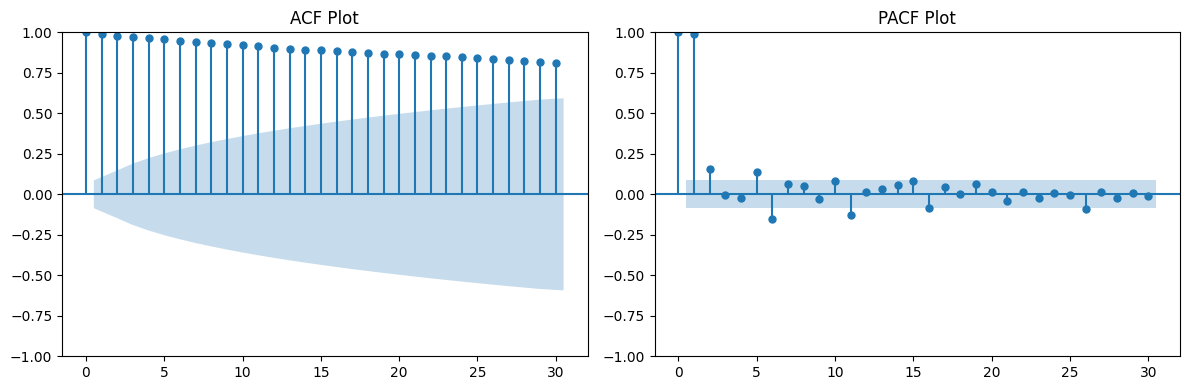

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Rate'], ax=ax1, lags=30)
ax1.set_title('ACF Plot')
plot_pacf(df['Rate'], ax=ax2, lags=30)
ax2.set_title('PACF Plot')
plt.tight_layout()
plt.show()

# Table 3: GARCH(1,1) Parameter Estimates
Fit a GARCH(1,1) model to the returns and display a table with ω, α₁, β₁, standard errors, and persistence (α + β) using the arch library.

In [5]:
# GARCH Model
returns = df['Returns']
garch_model = arch_model(returns, vol="Garch", p=1, q=1)
garch_fitted = garch_model.fit(disp="off")

# Parameters
omega = garch_fitted.params['omega']
alpha1 = garch_fitted.params['alpha[1]']
beta1 = garch_fitted.params['beta[1]']
persistence = alpha1 + beta1

# Standard errors
omega_se = garch_fitted.std_err['omega']
alpha1_se = garch_fitted.std_err['alpha[1]']
beta1_se = garch_fitted.std_err['beta[1]']

garch_table = {
    'ω': [omega],
    'α₁': [alpha1],
    'β₁': [beta1],
    'ω SE': [omega_se],
    'α₁ SE': [alpha1_se],
    'β₁ SE': [beta1_se],
    'Persistence (α + β)': [persistence]
}

garch_df = pd.DataFrame(garch_table)
print("Table 3: GARCH(1,1) Parameter Estimates")
print(garch_df.to_string(index=False))

Table 3: GARCH(1,1) Parameter Estimates
       ω       α₁  β₁     ω SE    α₁ SE    β₁ SE  Persistence (α + β)
0.274699 0.403248 0.0 0.078866 0.102606 0.152562             0.403248


In [10]:
garch_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -494.831
Distribution:                  Normal   AIC:                           997.661
Method:            Maximum Likelihood   BIC:                           1014.68
                                        No. Observations:                  520
Date:                Sun, Dec 21 2025   Df Residuals:                      519
Time:                        12:24:48   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.1813e-03  2.677e-02      0.119      0.905 [-4.929e-02,5.565e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2747  7.887e-02      3.483  4.956e-04 [  0.120,  0.429]
alpha[1]       0.4032      0.103      3.930  8.492e-05 [  0.202,  0.604]
beta[1]        0.0000      0.153      0.000      1.000 [ -0.299,  0.299]
========================================================================

Covariance estimator: robust
"""

# Figure 7: Returns Series Plot
Plot the daily percentage returns to show volatility clustering using matplotlib.

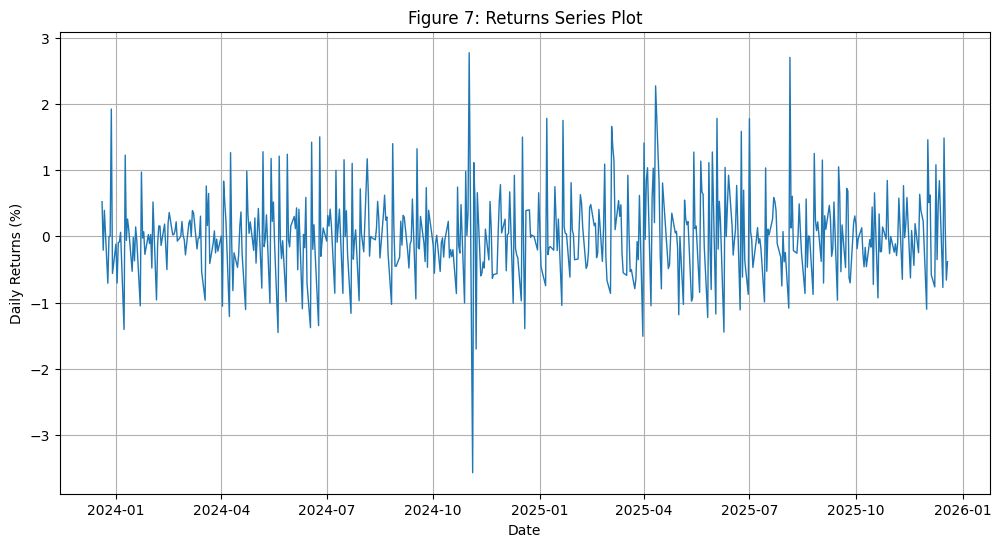

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Returns'], linewidth=1)
plt.title('Figure 7: Returns Series Plot')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.show()

# Histogram of Returns (Optional)
Create a histogram of the daily returns using matplotlib.

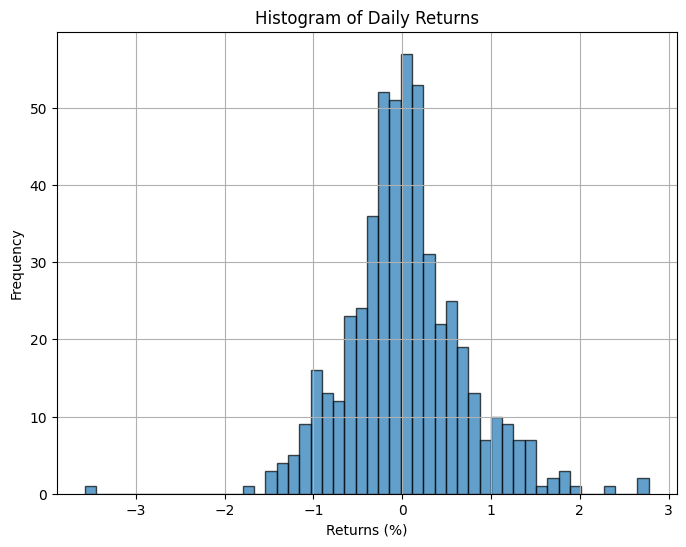

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Returns'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Figure 8: ARIMA Forecast vs Actual
Plot historical data (solid line) and ARIMA forecast (dashed line) with forecast horizon marked using matplotlib.

c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingn\OneDrive\Documents\GitHub\Forex-Application\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837:

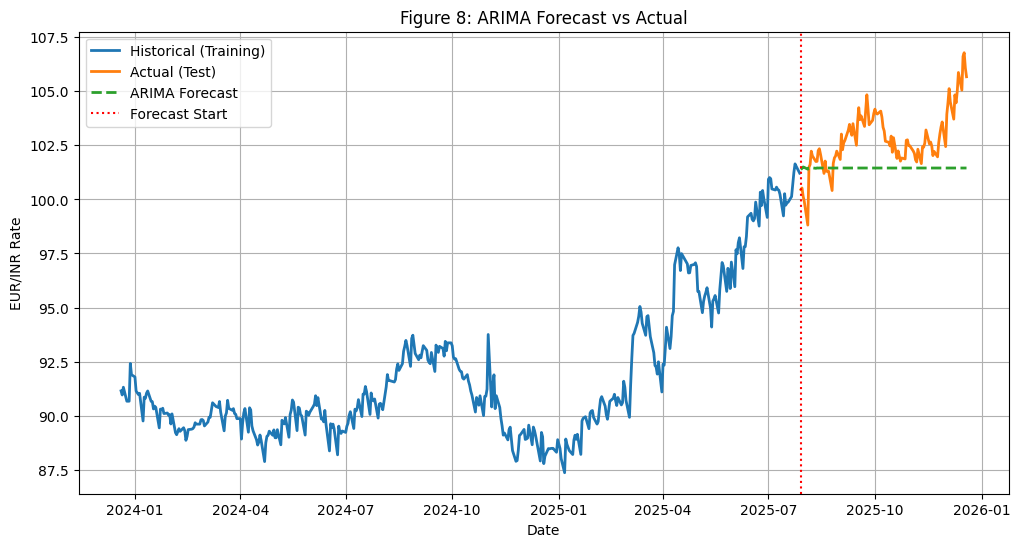

In [13]:
# Split data for forecast
train_size = int(len(df) * 0.8)
train = df['Rate'][:train_size]
test = df['Rate'][train_size:]

# Fit ARIMA on train
arima_model_train = ARIMA(train, order=(5, 1, 0))
arima_fitted_train = arima_model_train.fit()

# Forecast
forecast_steps = len(test)
forecast = arima_fitted_train.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], train, label='Historical (Training)', linewidth=2)
plt.plot(df.index[train_size:], test, label='Actual (Test)', linewidth=2)
plt.plot(df.index[train_size:], forecast_values, label='ARIMA Forecast', linestyle='--', linewidth=2)
plt.axvline(x=df.index[train_size], color='red', linestyle=':', label='Forecast Start')
plt.title('Figure 8: ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('EUR/INR Rate')
plt.legend()
plt.grid(True)
plt.show()

# Figure 9: Conditional Volatility Plot
Plot the time-varying conditional volatility from the GARCH model, highlighting high-risk periods using matplotlib.

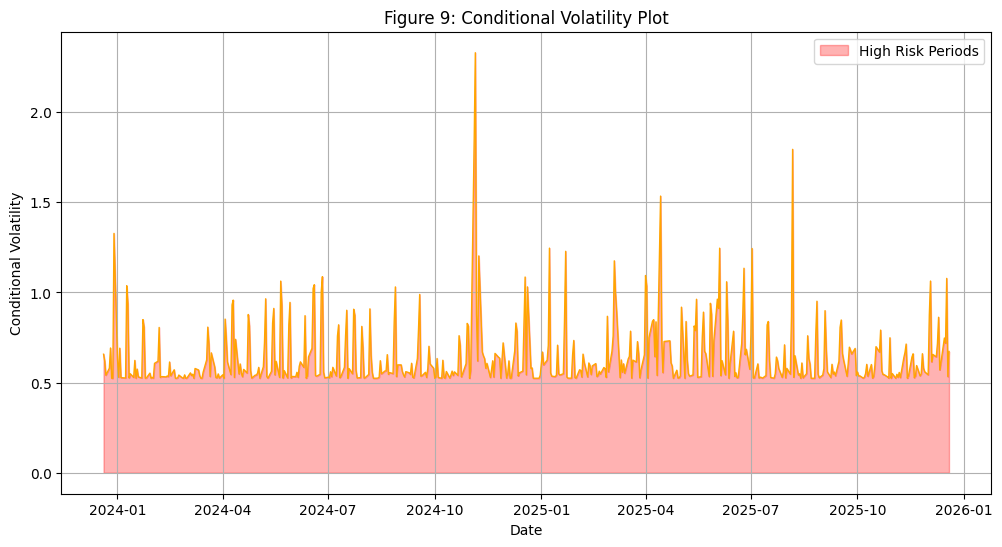

In [14]:
# Conditional volatility
conditional_volatility = garch_fitted.conditional_volatility

plt.figure(figsize=(12, 6))
plt.plot(df.index, conditional_volatility, linewidth=1, color='orange')
plt.title('Figure 9: Conditional Volatility Plot')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')

# Highlight high-risk periods (e.g., volatility > 0.5)
high_risk = conditional_volatility > 0.5
plt.fill_between(df.index, 0, conditional_volatility, where=high_risk, color='red', alpha=0.3, label='High Risk Periods')

plt.legend()
plt.grid(True)
plt.show()

# Table 4: Summary of Model Contributions
Create a table summarizing the purpose and output of OLS, ARIMA, and GARCH models for the app using pandas.

In [15]:
# Summary table
summary_data = {
    'Model': ['OLS', 'ARIMA', 'GARCH'],
    'Purpose': ['Long-run trend', 'Mean forecast', 'Risk assessment'],
    'Output Used in App': ['Trend signal', 'Predicted rate', 'Volatility category']
}

summary_df = pd.DataFrame(summary_data)
print("Table 4: Summary of Model Contributions")
print(summary_df.to_string(index=False))

Table 4: Summary of Model Contributions
Model         Purpose  Output Used in App
  OLS  Long-run trend        Trend signal
ARIMA   Mean forecast      Predicted rate
GARCH Risk assessment Volatility category
